In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)

# 1

### Generate 1,000 samples having normal distribution with a mean of 100 and a variance of 1

In [2]:
s = np.round_(np.random.normal(loc = 100, scale = 1, size = 1000), 1)
pd.DataFrame(s,columns = ['value']).head()

,value
0,101.8
1,100.4
2,101.0
3,102.2
4,101.9


In [3]:
print(f'min: {np.min(s)}')
print(f'max: {np.max(s)}')

min: 97.0
max: 102.8


Drawing graph

In [4]:
uniq, counts = np.unique(s, return_counts=True)

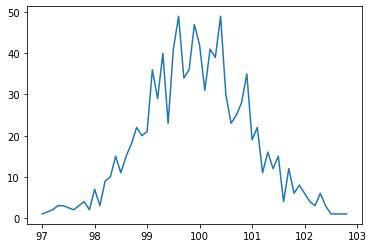

In [5]:
plt.plot(uniq, counts)
plt.show()

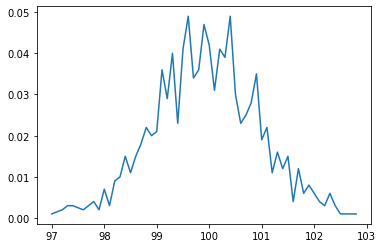

In [6]:
probability = counts/1000
plt.plot(uniq, probability)
plt.show()

## 2

# <center>Single population</center>
### <center> Estimate mean </center>
$$ \overline{X} = \frac{1}{n}\sum_{i=1}^{n}X_i $$
### <center> Estimate variance </center>
$$S^2 = \frac{1}{n-1}\sum_{i=1}^{n}(X_i-\overline{X})^2 $$
### <center> Using sample distribution, Estimate population mean and variance with 95% confidence interval </center>
$$ \overline{x} - z_{0.025}\frac{s}{\sqrt{n}} < \mu < \overline{x} + z_{0.025}\frac{s}{\sqrt{n}} $$
### <center> Using sample distribution, Estimate population mean and variance with 95% confidence interval </center>
$$ \frac{(n-1)s^2}{\chi_{0.025}^2} < \sigma^2 < \frac{(n-1)s^2}{\chi_{1-0.025}^2} $$
### <center> Estimate population mean without knowing population variance </center>
$$ \overline{x} - t_{0.025}\frac{s}{\sqrt{n}} < \mu < \overline{x} + t_{0.025}\frac{s}{\sqrt{n}} $$

In [7]:
def get_mean(X, n):
    return np.round_(np.sum(X) / n, 2)

def get_var(X, X_mean, n):
    res = np.sum((X-X_mean)**2) / (n - 1)
    res = np.round_(res, 2)
    return res

def estimate_population_mean(mean, s, n):
    min_val = mean - 1.96 * s / np.sqrt(n)
    max_val = mean + 1.96 * s / np.sqrt(n)
    
    min_val = np.round_(min_val, 2)
    max_val = np.round_(max_val, 2)
    return min_val, max_val

def estimate_population_var(s, n):
    min_val = (n-1) * s ** 2 / 19.023 ** 2
    max_val = (n-1) * s ** 2 / 2.7 ** 2
    
    min_val = np.round_(min_val, 2)
    max_val = np.round_(max_val, 2)
    return min_val, max_val

def estimate_population_mean_t_distribution(mean, s, n):
    min_val = mean - 2.447 * s / np.sqrt(n)
    max_val = mean + 2.447 * s / np.sqrt(n)
    
    min_val = np.round_(min_val, 2)
    max_val = np.round_(max_val, 2)
    return min_val, max_val

#### Randomly sample 10 samples from population

In [9]:
samples_10_1 = np.random.choice(s, 10)
mean_10_1 = get_mean(samples_10_1, 10)
var_10_1 = get_var(samples_10_1, mean_10_1, 10)

print('Randomly sample 10 samples from population : {}'.format(', '.join(map(str,samples_10_1))))
print()
print(f'Estimate sample mean: {mean_10_1}')
print(f'Estimate sample variance: {var_10_1}')

Randomly sample 10 samples from population : 100.2, 99.0, 100.4, 100.8, 100.4, 97.7, 100.0, 100.3, 100.7, 98.7

Estimate sample mean: 99.82
Estimate sample variance: 1.03


In [10]:
epm_10_1 = [*estimate_population_mean(mean_10_1, var_10_1, 10)]
print(f'Estimate population mean with 95% confidence interval : {epm_10_1[0]} < μ < {epm_10_1[1]}')

epv_10_1 = [*estimate_population_var(var_10_1, 10)]
print(f'Estimate population variance with 95% confidence interval : {epv_10_1[0]} < σ < {epv_10_1[1]}')

epmtd_10_1 = [*estimate_population_mean_t_distribution(mean_10_1, var_10_1, 10)]
print(f'Estimate population mean with 95% confidence interval in t-distribution : {epmtd_10_1[0]} < μ < {epmtd_10_1[1]}')

Estimate population mean with 95% confidence interval : 99.18 < μ < 100.46
Estimate population variance with 95% confidence interval : 0.03 < σ < 1.31
Estimate population mean with 95% confidence interval in t-distribution : 99.02 < μ < 100.62


#### Randomly sample 30 samples from population

In [11]:
samples_30_1 = np.random.choice(s, 30)
mean_30_1 = get_mean(samples_30_1, 30)
var_30_1 = get_var(samples_30_1, mean_30_1, 30)

print('Randomly sample 30 samples from population : {}'.format(', '.join(map(str,samples_30_1))))
print()
print(f'Estimate sample mean: {mean_30_1}')
print(f'Estimate sample variance: {var_30_1}')

Randomly sample 30 samples from population : 99.5, 101.1, 99.9, 99.0, 98.9, 99.5, 100.3, 100.5, 100.1, 99.7, 99.2, 100.0, 102.1, 100.3, 100.2, 99.7, 97.9, 101.4, 101.7, 100.4, 101.2, 100.9, 99.9, 100.1, 99.5, 99.9, 98.7, 99.6, 100.4, 98.9

Estimate sample mean: 100.02
Estimate sample variance: 0.86


In [12]:
epm_30_1 = [*estimate_population_mean(mean_30_1, var_30_1, 10)]
print(f'Estimate population mean with 95% confidence interval : {epm_30_1[0]} < μ < {epm_30_1[1]}')

epv_30_1 = [*estimate_population_var(var_30_1, 10)]
print(f'Estimate population variance with 95% confidence interval : {epv_30_1[0]} < σ < {epv_30_1[1]}')

epmtd_30_1 = [*estimate_population_mean_t_distribution(mean_10_1, var_10_1, 10)]
print(f'Estimate population mean with 95% confidence interval in t-distribution : {epmtd_30_1[0]} < μ < {epmtd_30_1[1]}')

Estimate population mean with 95% confidence interval : 99.49 < μ < 100.55
Estimate population variance with 95% confidence interval : 0.02 < σ < 0.91
Estimate population mean with 95% confidence interval in t-distribution : 99.02 < μ < 100.62
